# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101359873-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
        <button style="padding:10px 20px; font-size:16px; background-color: #FFA500; color:white; border:none; border-radius:5px; cursor:pointer;">
            Buy Advanced Portfolio Optimization Book on Springer
        </button>
    </a>
<br>
<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 2: Portfolio Optimization with Risk Factors using Stepwise Regression

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%%**********************]  30 of 30 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6780%,0.1634%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1377%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1480%,-0.5898%,0.1491%,-0.6184%


## 2. Estimating Mean Variance Portfolios

### 2.1 Estimating the loadings matrix.

This part is just to visualize how Riskfolio-Lib calculates a loadings matrix.

In [3]:
import riskfolio as rp

step = 'Forward' # Could be Forward or Backward stepwise regression
loadings = rp.loadings_matrix(X=X, Y=Y, stepwise=step)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6551,0.0000,0.9406,-0.7883,1.7237
BA,0.0005,0.0000,1.1744,0.3616,-0.4322,0.0000
BAX,0.0003,0.3146,0.0000,0.0000,0.7717,0.0000
BMY,-0.0003,0.0000,0.8123,0.0000,0.0000,0.0000
CMCSA,0.0001,0.0000,0.4958,0.0000,0.4962,0.0000
CNP,0.0001,-0.5595,-0.2157,0.0000,1.8341,0.0000
CPB,-0.0003,-0.4782,-0.5993,0.0000,2.0793,0.0000
DE,0.0004,0.0000,0.0000,0.3631,0.0000,0.8090
HPQ,0.0002,0.0000,0.0000,0.0000,0.0000,1.2514
JCI,0.0001,0.0000,0.0000,0.3412,0.0000,0.5797


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

port.factors = X
port.factors_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.alpha = 0.05
model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.9508%,11.8687%,0.0000%,0.0000%,9.7091%,0.0000%,4.3627%,0.0000%,0.0000%,...,10.4798%,0.0000%,0.0000%,0.0000%,0.0000%,5.5106%,1.3028%,0.0000%,4.0984%,0.0000%


### 2.3 Plotting portfolio composition

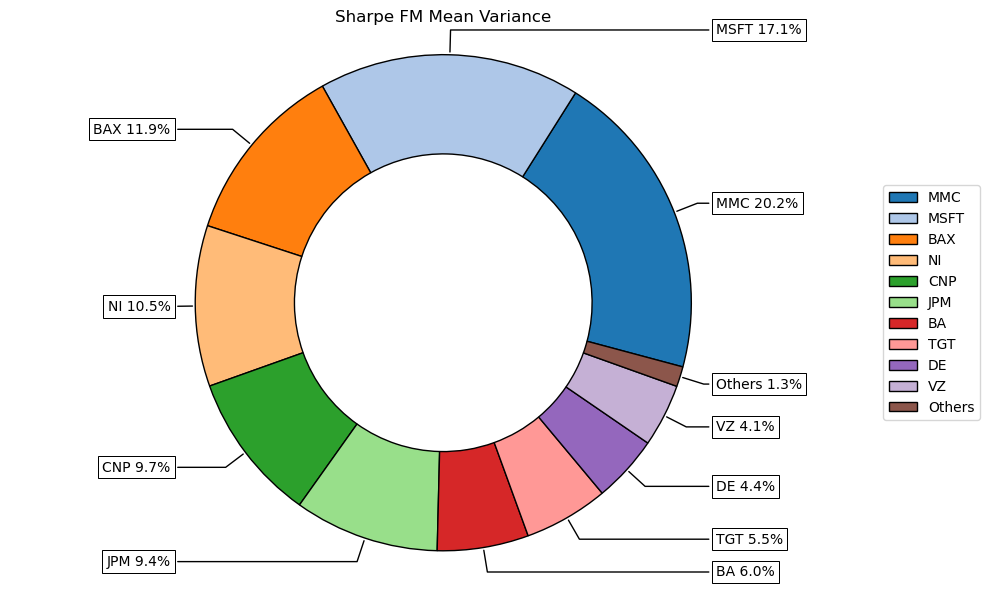

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,1.9932%,4.4200%,3.5980%,8.4944%,5.0090%,0.0000%,0.0000%,4.4334%,...,12.0935%,0.0000%,13.3194%,1.0113%,8.3006%,4.0840%,0.0000%,0.0000%,10.3126%,1.6683%
1,0.0000%,1.6594%,6.2598%,1.2539%,3.4249%,10.4169%,3.1169%,0.3979%,0.0000%,2.5871%,...,13.7064%,0.0000%,7.7371%,0.0000%,6.7064%,4.9334%,0.0000%,0.0000%,10.5790%,1.6514%
2,0.0000%,2.3023%,7.3159%,0.0000%,3.0349%,11.1003%,2.4078%,0.9815%,0.0000%,1.6502%,...,14.3024%,0.0000%,5.5452%,0.0000%,6.0225%,5.1519%,0.0000%,0.0000%,10.6635%,1.4141%
3,0.0000%,2.8523%,8.2123%,0.0000%,2.5285%,11.5853%,1.6263%,1.4953%,0.0000%,0.6298%,...,14.6707%,0.0000%,3.1893%,0.0000%,5.2024%,5.3155%,0.0771%,0.0000%,10.5638%,1.1082%
4,0.0000%,3.3064%,8.9462%,0.0000%,2.0093%,11.9273%,0.8756%,1.9174%,0.0000%,0.0000%,...,14.8954%,0.0000%,0.9660%,0.0000%,4.3812%,5.4381%,0.4351%,0.0000%,10.3775%,0.7796%


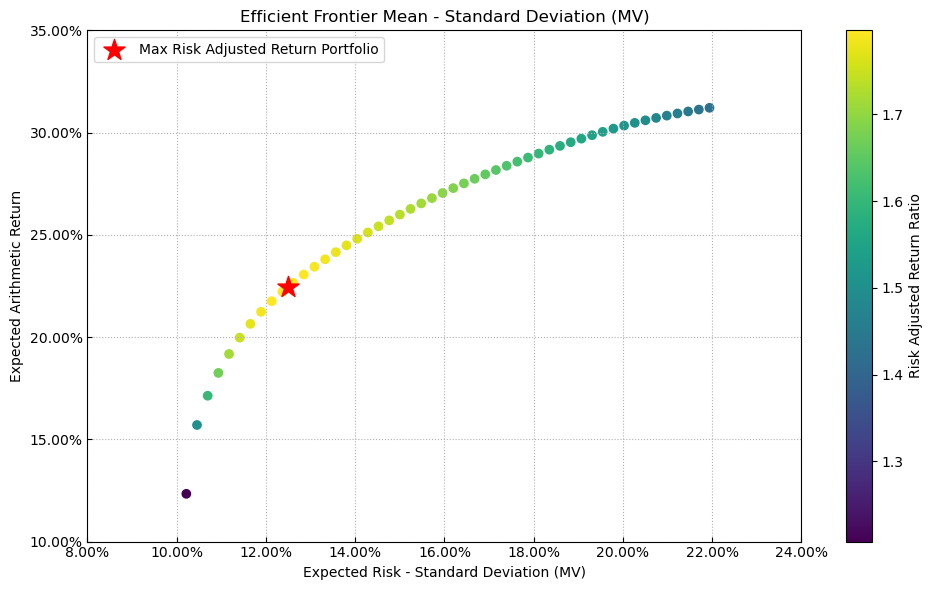

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

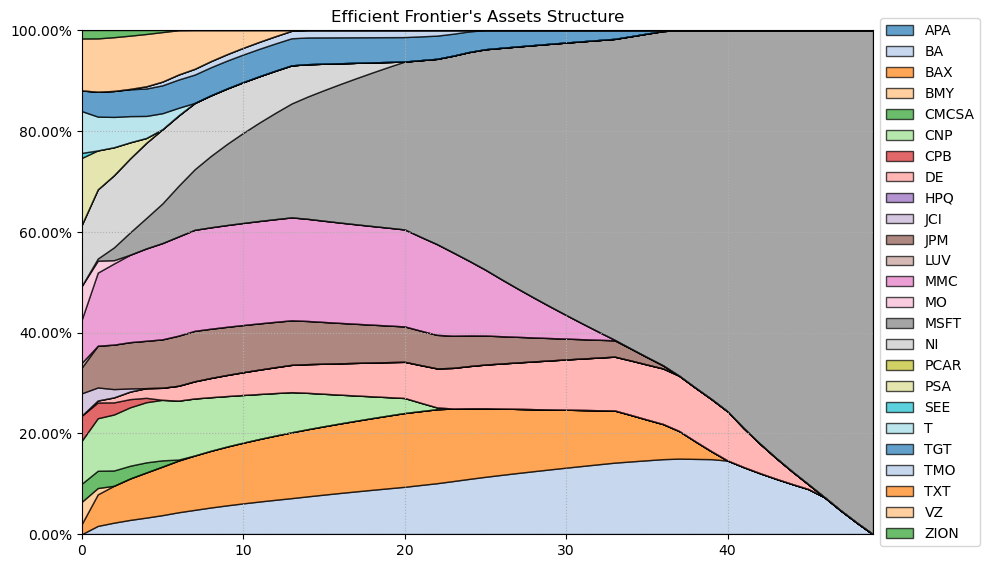

In [8]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Optimization with Constraints on Risk Factors

### 3.1 Statistics of Risk Factors

In [9]:
# Displaying factors statistics

display(loadings.min())
display(loadings.max())
display(X.corr())

const    -0.0583%
MTUM    -65.5123%
QUAL    -59.9338%
SIZE    -28.9787%
USMV    -82.0339%
VLUE    -49.1499%
dtype: float64

const     0.0504%
MTUM    103.0221%
QUAL    117.4377%
SIZE     94.0620%
USMV    232.5673%
VLUE    172.3679%
dtype: float64

,MTUM,QUAL,SIZE,USMV,VLUE
MTUM,100.0000%,90.4264%,79.1171%,87.2321%,78.5394%
QUAL,90.4264%,100.0000%,89.8167%,89.9554%,91.6580%
SIZE,79.1171%,89.8167%,100.0000%,82.5078%,87.9110%
USMV,87.2321%,89.9554%,82.5078%,100.0000%,76.9677%
VLUE,78.5394%,91.6580%,87.9110%,76.9677%,100.0000%


### 3.2 Creating Constraints on Risk Factors

In [10]:
# Creating risk factors constraints

constraints = {'Disabled': [False, False, False, False, False],
               'Factor': ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE'],
               'Sign': ['<=', '<=', '<=', '>=', '<='],
               'Value': [-0.3, 0.8, 0.4, 0.8 , 0.9],
               'Relative Factor': ['', 'USMV', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Factor,Sign,Value,Relative Factor
0,False,MTUM,<=,-30.0000%,
1,False,QUAL,<=,80.0000%,USMV
2,False,SIZE,<=,40.0000%,
3,False,USMV,>=,80.0000%,
4,False,VLUE,<=,90.0000%,


In [11]:
C, D = rp.factors_constraints(constraints, loadings)

In [12]:
port.ainequality = C
port.binequality = D

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.5845%,1.4885%,0.0000%,0.0000%,17.4857%,0.0000%,4.0878%,0.0000%,0.0000%,...,13.9661%,1.3795%,0.0000%,0.0000%,0.3011%,4.4149%,0.0000%,0.0000%,10.5793%,2.0949%


To check if the constraints are verified, I will make a regression among the portfolio returns and risk factors:

In [13]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
y = np.matrix(returns) * np.matrix(w)
results = sm.OLS(y, X1).fit()
coefs = results.params

print(coefs)

const     0.0229%
MTUM    -30.0000%
QUAL     15.3061%
SIZE      1.7749%
USMV     92.6876%
VLUE     21.9819%
dtype: float64


### 3.3 Plotting portfolio composition

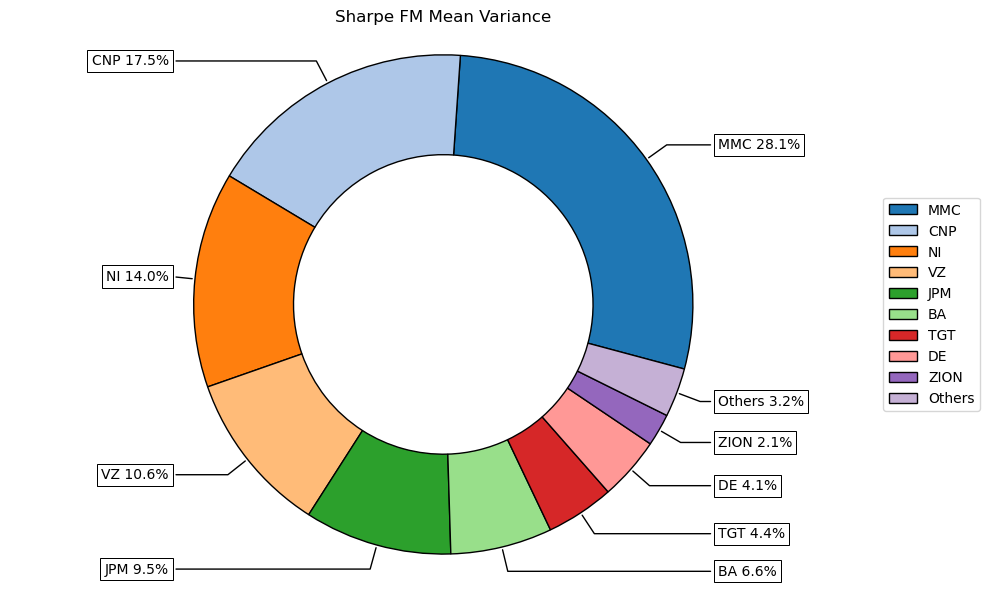

In [14]:
ax = rp.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.4 Calculate efficient frontier

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,1.9932%,4.4200%,3.5980%,8.4942%,5.0090%,0.0000%,0.0000%,4.4333%,...,12.0934%,0.0000%,13.3194%,1.0120%,8.3004%,4.0840%,0.0000%,0.0000%,10.3124%,1.6684%
1,0.0000%,1.0521%,4.5022%,1.9689%,3.3299%,10.3897%,3.6705%,0.0000%,0.0000%,2.9589%,...,13.4549%,0.0000%,9.1008%,0.0000%,7.4168%,4.6592%,0.0000%,0.0000%,10.8689%,1.9831%
2,0.0000%,1.7532%,4.8591%,0.7460%,2.9453%,11.4509%,3.1270%,0.3809%,0.0000%,2.0693%,...,14.1330%,0.0000%,7.2018%,0.0000%,7.1317%,4.7867%,0.0000%,0.0000%,11.2908%,2.0814%
3,0.0000%,2.2852%,5.0706%,0.0000%,2.6020%,12.3061%,2.6913%,0.7940%,0.0000%,1.3261%,...,14.6726%,0.0000%,5.6659%,0.0000%,6.8990%,4.8725%,0.0000%,0.0000%,11.6312%,2.1415%
4,0.0000%,2.7539%,5.1123%,0.0000%,2.1857%,13.1595%,2.2589%,1.1578%,0.0000%,0.5348%,...,15.1823%,0.0000%,4.1060%,0.0000%,6.6672%,4.9232%,0.0000%,0.0000%,11.9726%,2.1893%


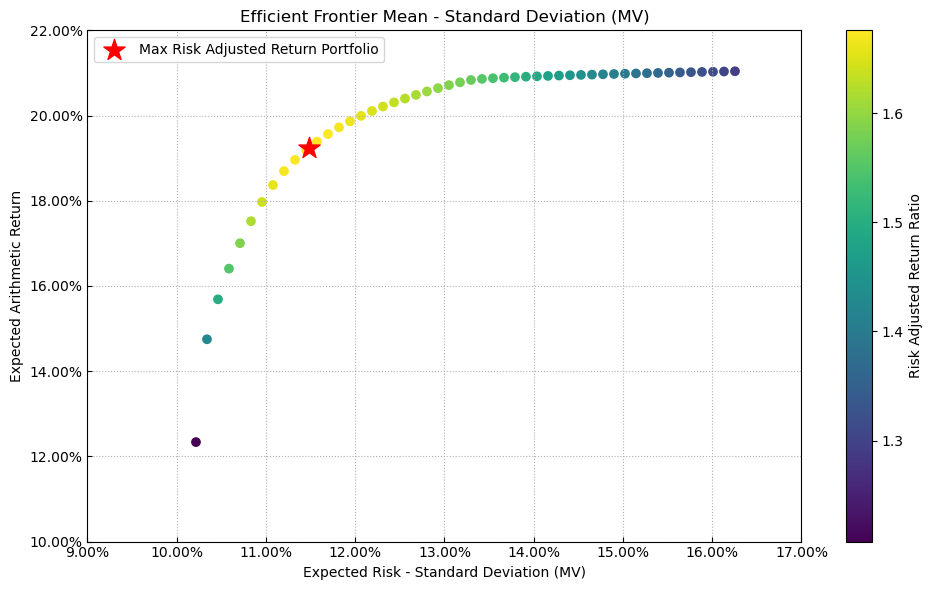

In [16]:
# Plotting efficient frontier composition

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

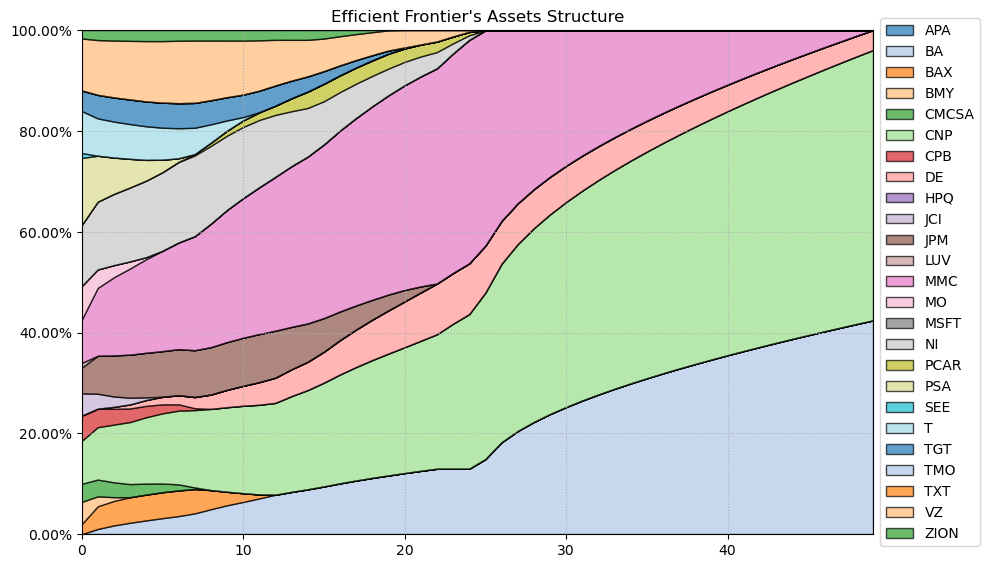

In [17]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [18]:
display(returns)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
2016-01-05,-0.6213%,0.0684%,0.7015%,0.1909%,0.4772%,0.9282%,0.9911%,0.1761%,0.2252%,0.1002%,...,1.1711%,-0.1121%,0.8782%,0.3501%,0.6946%,0.1709%,0.5663%,-0.2138%,0.9752%,-0.3551%
2016-01-06,-2.8767%,-1.2757%,-0.6189%,-0.9939%,-0.8928%,-0.5879%,-0.3664%,-1.6300%,-2.2664%,-1.2376%,...,-0.0190%,-2.1654%,-0.0372%,-1.3275%,-1.3600%,-1.3348%,-1.0117%,-1.8914%,-0.9196%,-2.5117%
2016-01-07,-2.6604%,-2.6675%,-1.9233%,-1.9592%,-1.9763%,-1.2059%,-0.9113%,-2.3281%,-2.6834%,-1.8334%,...,-0.8785%,-2.6707%,-1.0104%,-1.9321%,-1.3673%,-1.5868%,-2.5264%,-2.5834%,-1.1151%,-2.2577%
2016-01-08,-1.6387%,-1.2856%,-1.0493%,-0.9502%,-1.0563%,-1.0628%,-0.9908%,-1.2707%,-1.3400%,-1.0335%,...,-0.9976%,-1.3240%,-0.9136%,-1.2707%,-0.9352%,-0.7749%,-1.2534%,-1.3154%,-0.9451%,-1.1138%
2016-01-11,-2.1924%,-0.0562%,0.3345%,0.0940%,0.1556%,-0.0892%,-0.0997%,-0.6705%,-0.7531%,-0.5542%,...,0.2115%,-0.7574%,0.3162%,-0.5898%,-0.4232%,-0.4203%,0.3350%,-0.8258%,-0.1979%,-1.4464%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.9709%,0.6528%,0.7567%,0.4352%,0.6099%,0.6594%,0.6196%,0.9430%,1.0746%,0.6983%,...,0.5968%,0.7454%,0.4033%,0.7249%,0.7672%,0.6842%,0.7894%,0.7581%,0.7437%,0.9396%
2019-12-23,0.6972%,0.2477%,-0.4230%,-0.0181%,-0.1988%,-0.5600%,-0.7398%,0.1197%,0.1322%,0.0606%,...,-0.8528%,0.4842%,-0.6863%,-0.1715%,-0.3171%,0.1147%,-0.2473%,0.3183%,-0.5772%,0.6377%
2019-12-24,-0.1966%,0.0027%,0.1506%,-0.0503%,0.0391%,0.0930%,0.1006%,0.0558%,-0.0071%,0.0206%,...,0.1566%,-0.1185%,0.0728%,-0.0239%,0.0209%,0.0305%,0.0896%,-0.0882%,0.0778%,-0.0759%
2019-12-26,0.0838%,0.3934%,0.3568%,0.2717%,0.3344%,0.2787%,0.1966%,0.3100%,0.3689%,0.2053%,...,0.2525%,0.3537%,0.2093%,0.2124%,0.2761%,0.2577%,0.4285%,0.2202%,0.2812%,0.2258%


## 4. Estimating Portfolios Using Risk Factors with Other Risk Measures

In this part I will calculate optimal portfolios for several risk measures. I will find the portfolios that maximize the risk adjusted return for all available risk measures.

### 4.1 Calculate Optimal Portfolios for Several Risk Measures.

I will mantain the constraints on risk factors.

In [19]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [20]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.58%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,1.49%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,17.49%,42.33%,53.62%,41.97%,53.62%,41.32%,53.62%,48.75%,0.00%,46.94%,23.94%,46.45%,48.69%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,4.09%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

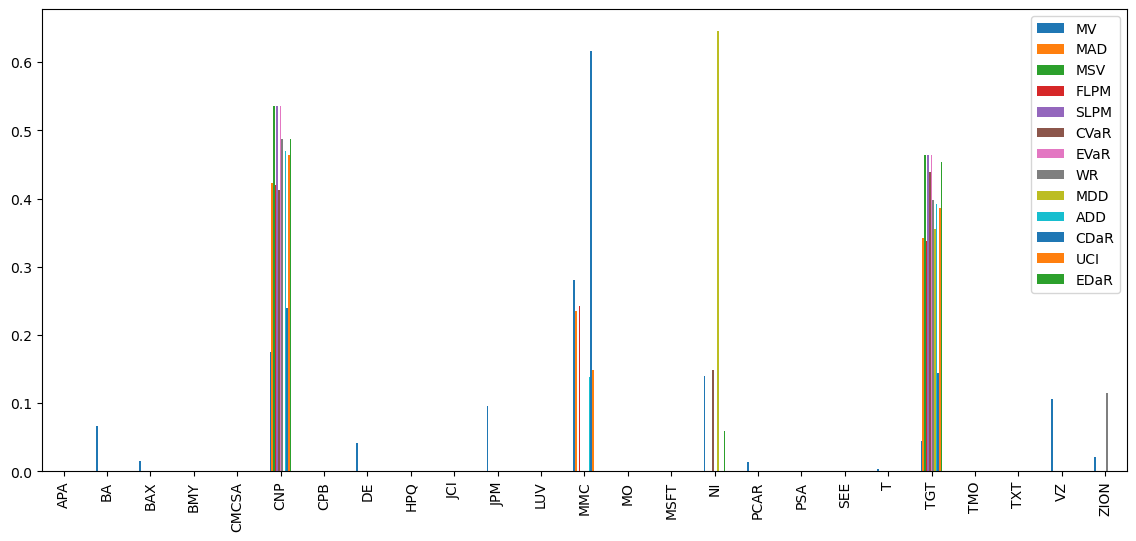

In [21]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [22]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = True
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [23]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,7.45%,7.00%,8.25%,6.48%,8.43%,8.52%,8.42%,0.00%,7.16%,14.01%,16.29%,15.08%,8.71%
BAX,1.03%,1.30%,0.36%,0.95%,0.22%,3.48%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,17.82%,13.25%,17.50%,12.81%,17.98%,21.30%,31.62%,29.80%,55.32%,11.75%,27.54%,16.60%,44.55%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.49%,7.20%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.77%,1.98%,2.68%,2.93%,2.82%,3.09%,1.64%,0.00%,5.45%,0.07%,0.00%,1.08%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

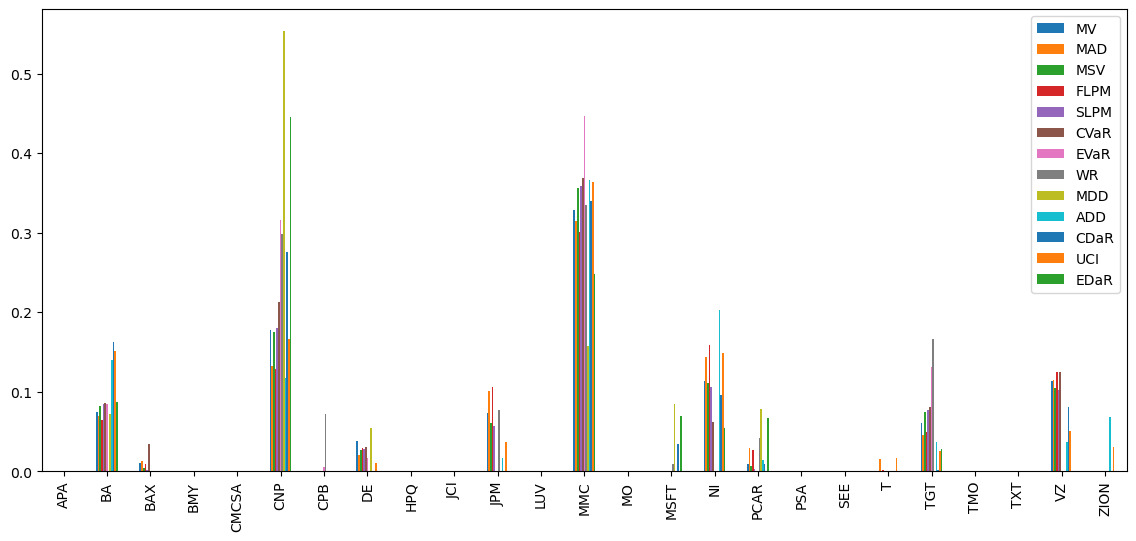

In [24]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)